<span style="color:red">Homework Grade: 5.7</span>

P1 grade: 10/10 - well done!

P2 grade: 6/10 - latitiudes should not vary that much and your longitudes are off by about 50m-100m sometimes

P3 grade: 7/10 - CDD is incorrect. 

P4 grade: 2/10 - There were dates that worked. The date you were wondering about was just an example showing how to format your output. 

P5 grade: 3.5/10 Code did not initially run. I fixed a spelling error for you and it worked. Only one plot was outuptted; missing reflection



# Homework Assignment 3

Save your assignment in your **mp248** repository, in **mp248/Assignments/hwk.3.ipynb**.  

The pre-grading script will offer feedback on problems P1, P2, P3 and P4.

Your assignment is due at **11:59pm** on **Friday November 15th**.

----

## P.1 - Crime stats

Construct a dictionary whose keys are the crime types, and whose values are lists (in descending order) of the five dates with the most crimes of that type. Only include crimes where there are **at least** five dates with ten or more occurances of that crime type. If two or more dates have the same number of crime records, sort them so that the earlier date appears first, i.e. Dec 10th 2014 would be before Jan 2nd 2015.  Print your dictionary with the **pprint** command.

**Hint:** There are only 7 crime types that meet the above criterion.

In [1]:
%cd ../../mp248-course

/home/user/mp248-course


In [2]:
#import cdat
from cdat import cDat

Crime database library.

Looking for vicpd.geojson in directory ./Data/
 modify the cdatfile and cdatloc variables in cdat.py appropriately
 if the file can not be found.

Complete records in cDat, incomplete records in bDat.



In [13]:
import collections as co
import pprint as pp
import operator as op
import calendar as cal
import datetime as dt

In [4]:
pp.pprint([cDat[x] for x in range(1)])

[{'ID': 760527874,
  'address': '1200 Block JOHNSON ST',
  'case_number': (16, 22918),
  'city': 'victoria',
  'coords': (-123.348998693722, 48.4255680718449),
  'cre_dt': datetime.datetime(2016, 5, 26, 9, 46, 43),
  'inc_dt': datetime.datetime(2016, 5, 25, 1, 29),
  'type': ('Disorder', 'CAUSE A DISTURBANCE'),
  'upd_dt': datetime.datetime(2016, 6, 23, 19, 40, 33)}]


In [5]:
print(type(cDat[0]))

<class 'dict'>


In [6]:
types = {c['type'] for c in cDat}
di = dict()
for typ in types:
    ctdict = co.defaultdict(int)
    for c in cDat:
        if c['type'] == typ:
            ctdict[c['inc_dt'].date()] += 1

    # Sort by count, then dates
    sorted_ctdict = sorted([(x,y) for x,y in ctdict.items()], key = lambda x: (x[1], -x[0].year, -x[0].month, -x[0].day) )[-1:-6:-1]
    #pp.pprint(sorted_ctdict)
    if sorted_ctdict[-1][1] > 9:
        temp = sorted_ctdict
        di[typ] = [i  for i, j in temp]

In [7]:
#pp.pprint(sorted_ctdict)

In [8]:
pp.pprint(di)

{('Disorder', 'CAUSE A DISTURBANCE'): [datetime.date(2014, 7, 6),
                                       datetime.date(2015, 4, 20),
                                       datetime.date(2011, 7, 3),
                                       datetime.date(2014, 8, 17),
                                       datetime.date(2014, 9, 2)],
 ('Liquor', 'LIQUOR-INTOX IN PUBLIC PLACE'): [datetime.date(2011, 7, 1),
                                              datetime.date(2013, 7, 1),
                                              datetime.date(2015, 7, 1),
                                              datetime.date(2012, 7, 1),
                                              datetime.date(2014, 7, 1)],
 ('Other', 'BYLAW-NOISE'): [datetime.date(2011, 7, 2),
                            datetime.date(2011, 10, 29),
                            datetime.date(2015, 10, 17),
                            datetime.date(2013, 5, 4),
                            datetime.date(2011, 10, 30)],
 ('Other', 'SUSPICI

In [9]:
print(len(di))

7


----

## P.2 - Average crime locations.

Write a function that uses [spherical polar coordinates](https://en.wikipedia.org/wiki/Spherical_coordinate_system) to convert the **(longitude,latitude)** coordinate pairs into 3-dimensional Euclidean coordinates.  Compute the average location (in 3-dimensional space) of all the crime types in the **cdat.cDat** variable.  Invert your spherical polar coordinates, creating a dictionary indexed by crime types, returning the **(longitude,latitude)** pair of the average location for that crime type. Print your final dictionary using **pp.pprint**. 

**Note:** if you do not recall how longitude and latitude relate to spherical polar coordinates, read the above Wikipedia article carefully, together with the [longitude-latitude](https://en.wikipedia.org/wiki/Geographic_coordinate_system) page.

In [10]:
import numpy as np
import math as ma

In [11]:
def polar_to_cartesian(long, lat):
    '''
    Convert spherical polar coordinates to 3D Euclidean coordinates
    In this case, r = 1
    '''
    # lab x = rcos(lat)cos(long) vs wiki x = rsin(θ)cos(φ)
    # lab y = rcos(lat)sin(long) vs wiki y = rsin(θ)sin(φ)
    # lab z = rsin(lat) vs wiki z = rcos(θ)
    # θ = lat, φ = long
    # First: Convert degree to radians for numpy
    x = np.sin(ma.radians(lat))*np.cos(ma.radians(long))
    y = np.sin(ma.radians(lat))*np.sin(ma.radians(long))
    z = np.cos(ma.radians(lat))
    return(x, y, z)

def cartesian_to_polar(x_coords, y_coords, z_coords):
    '''
    Convert cartesian coordinates to spherical polar coordinates
    '''
    # θ = lat, φ = long
    r = 1
    lat = ma.degrees(np.arccos(z_coords/r))
    long = ma.degrees(np.arctan(y_coords/x_coords))
    if long > 0:
        long =  -180 + long
    return(long, lat)

In [12]:
print("(-123.35_, 48.43_) ->",polar_to_cartesian(-123.348998693722, 48.4255680718449))
print("->",cartesian_to_polar(-0.41125540309882863, -0.6249112431808368, 0.6635924438751551))

(-123.35_, 48.43_) -> (-0.41125540309882863, -0.6249112431808368, 0.6635924438751551)
-> (-123.348998693722, 48.4255680718449)


In [13]:
dict2 = dict()
## For each type of crimes, take (lat, long), convert to Cartesian
## Then take the avg of each x,y,z coords by sum/(#num of crimes)
## Convert back to polar. Return a dictionary of avg polar.
for typ in types:
    sum_x = 0
    sum_y = 0
    sum_z = 0
    total_crime_count = 0
    ctdict = co.defaultdict(int)
    for c in cDat:
        if c['type'] == typ:
            ctdict[c['coords']] += 1
    for i in ctdict.items():
        lat1 = i[0][0]
        long1 = i[0][1]
        crime_count = i[1]
        x, y, z = polar_to_cartesian(lat1, long1)
        #print(i[0])
        #print(x,y,z)
        total_crime_count += crime_count
        sum_x += x
        sum_y += y
        sum_z += z 
    avg_coords = (sum_x/ total_crime_count, sum_y/total_crime_count, sum_z/total_crime_count)
    dict2[typ] = cartesian_to_polar(avg_coords[0], avg_coords[1],avg_coords[2])

In [14]:
pp.pprint(dict2)

{('Alarm', 'FALSE ALARMS'): (-123.36669657827778, 63.72855910561595),
 ('Arson', 'ARSON-DISREGARD FOR HUMAN LIFE'): (-123.36434309858242,
                                               54.50985805480552),
 ('Arson', 'ARSON-PROPERTY'): (-123.36835002189386, 51.59940406949776),
 ('Assault', 'ASSAULT AGAINST POLICE OFFICER'): (-123.36720488648099,
                                                 56.77419339232461),
 ('Assault', 'ASSAULT-COMMON OR TRESPASS'): (-123.3697481856791,
                                             73.12474744226293),
 ('Assault', 'ASSAULTS-OTHER'): (-123.36845048912659, 58.23153330122856),
 ('Assault with Deadly Weapon', 'ASSAULT OT P/O-W/WPN OR CBH'): (-123.36635892685001,
                                                                 54.81660656340022),
 ('Assault with Deadly Weapon', 'ASSAULT POLICE-W/WEAPON OR CBH'): (-123.36700827186367,
                                                                    50.9239546782655),
 ('Assault with Deadly Weapon', '

----

## P.3 - Crime + Weather data

Load the crime and weather data, i.e. the **cdat.py** and **wdat.py** libraries.

Determine the set of days where we have crime data and weather data, specifically.

1. Dates where we have crime reports in our **cDat** variable.
2. Dates with crime reports and the max/min/mean temperature readings for Victoria in **wdat**. 
3. Dates with crime reports and the max/min/mean temperature readings and the Rain/Precipitation/Snow totals.

Let the number of elements of (1) be **CDD**.  The number of elements of (2) as **CDTD**.  The number of elements of (3) as **CDTPD**,
then execute the command below.

`print(CDD, 'crime data days', CDTD, 'crime data + temp days', CDTPD, 'crime data + precipitation + temp days')`


In [15]:
%cd Assignments/

/home/user/mp248-course/Assignments


In [16]:
#import wdat as wDat
from wdat import mdat

wdat.py looking in: /home/user/mp248-course/Assignments/../Data/CWD/
 for CHWD .csv files. Correct the 'route' variable if needed.
Transport Canada codes for each city: 
defaultdict(<class 'set'>,
            {'w.cal': {'YYC'},
             'w.edm': {'YEG'},
             'w.sask': {'YXE', 'POX'},
             'w.vic': {'YYJ'}})
Weather data loaded. 71588 records, total.


In [17]:
## All inc_dt from cDat
c_date = [e['inc_dt'].date() for e in cDat]
#pp.pprint(c_date)

In [18]:
## Check for dt.date(2013, 5, 25) in crime data
print(dt.date(2013, 5, 25) in c_date)

True


In [19]:
## 1. All weather data in Victoria that has the same dates as in c_date
CDD_dat = [c for c in mdat.items() if ('w.vic' in c[0][0]) and (c[0][1] in c_date)]
CDD = len(CDD_dat)
pp.pprint(CDD)
print(dt.date(2013, 5, 25) in [ i[0][1] for i in CDD_dat ]) ## Check for dt.date(2013, 5, 25) in weather data

2892
True


In [20]:
## No Max Temp record for dt.date(2013, 5, 25), although this date exist in P4 description?
## Let me know in the feedback
pp.pprint([c for c in mdat.items() if ('w.vic' in c[0][0]) and dt.date(2013, 5, 25) in c[0]])

[(('w.vic', datetime.date(2013, 5, 25)), {'Data Quality': '‡'})]


In [21]:
pp.pprint(CDD_dat[200])

(('w.vic', datetime.date(2013, 7, 20)),
 {'Cool Deg Days (°C)': '0.0',
  'Data Quality': '‡',
  'Heat Deg Days (°C)': '1.8',
  'Max Temp (°C)': 20.3,
  'Mean Temp (°C)': 16.2,
  'Min Temp (°C)': 12.1,
  'Spd of Max Gust (km/h)': '<31',
  'Total Precip (mm)': 0.0,
  'Total Rain (mm)': 0.0,
  'Total Snow (cm)': 0.0})


In [22]:
## 2. Dates with crime reports and the max/min/mean temperature readings for Victoria in wdat.

CDTD_dat = [cd for cd in CDD_dat\
            if ('Max Temp (°C)' in cd[1]) and ('Mean Temp (°C)' in cd[1]) and ('Min Temp (°C)' in cd[1]) ]
CDTD = len(CDTD_dat)
pp.pprint(CDTD)
#pp.pprint(CDTD_dat)
print(dt.date(2013, 5, 25) in [ i[0][1] for i in CDTD_dat ])

2676
False


In [23]:
## 3. Dates with crime reports and the max/min/mean temperature readings and the Rain/Precipitation/Snow totals.
CDTPD_dat = [cdt for cdt in CDTD_dat\
             if ('Total Precip (mm)' in cdt[1]) and ('Total Rain (mm)' in cdt[1]) and ('Total Snow (cm)' in cdt[1]) ]
CDTPD = len(CDTPD_dat)
pp.pprint(CDTPD)

2621


In [24]:
print('length CDD =', CDD)
print('length CDTD =', CDTD)
print('length CDTPD =', CDTPD)

length CDD = 2892
length CDTD = 2676
length CDTPD = 2621


In [25]:
print(CDD, 'crime data days', CDTD, 'crime data + temp days', CDTPD, 'crime data + precipitation + temp days')

2892 crime data days 2676 crime data + temp days 2621 crime data + precipitation + temp days


----

## P.4 - Crime + Weather data


1. Find all the days where it was **6°C** warmer than the preceeding 7 days, i.e. the entire preceding week.  Compute the average crime rates for each crime type on these days.  Which crimes were more than twice as common on these days, compared to an average day?

2. Find all the days where it was **6°C** colder than the preceeding 7 days. Compute the average crime rates for each crime type on these days. Which crimes were more than twice as common on these days, compared to an average day?

Use the 'Max Temp (°C)' field for P.4. 

**Grading script** in parts 1 and 2, print your exceptional week weather, one exceptional week per line, in the form:

`2013-05-25 12.2 17.7 12.7 15.0 13.8 14.5 16.6 24.0`

if for example you found that May 25th of 2013 was 24.0c with the weather in the preceding week being the numbers between the date object and the temperature reading on 2013-05-25. 

In [26]:
CDTD_dat[0][1]['Max Temp (°C)']

20.9

In [27]:
P4_dat = [c for c in mdat.items() if ('w.vic' in c[0][0]) and (c[0][1] in c_date) and ('Max Temp (°C)' in c[1])]

In [28]:
print(dt.date(2013, 5, 25) in [ i[0][1] for i in P4_dat ])

False


In [29]:
sorted_CDTD_dat = sorted(CDTD_dat, key = op.itemgetter(0))
#pp.pprint([i for i in sorted_CDTD_dat]) # same as pp.pprint(sorted_CDTD_dat)

In [30]:
dt.date(2011, 1, 31)

datetime.date(2011, 1, 31)

In [31]:
print(dt.date(2011, 1, 31) in sorted_CDTD_dat[0][0])
print(dt.date(2011, 1, 31) in [ i[0][1] for i in sorted_CDTD_dat ])
print(dt.date(2013, 5, 25) in [ i[0][1] for i in sorted_CDTD_dat ]) # example date in description

True
True
False


In [32]:
pp.pprint(sorted_CDTD_dat[12][0][1] - dt.timedelta(days = 7) in c_date)

True


In [33]:
def check_crimedates(dat):
    '''
    For a particular date, check if any of its previous 7 days is (not) in the crime record
    '''
    for a in range(1,8):
        if dat[0][1] - dt.timedelta(days = a) in c_date:
            #pp.pprint(dat[0][1] - dt.timedelta(days = a))
            continue
        else:
            #pp.pprint(dat[0][1] - dt.timedelta(days = a))
            return False
    return True

In [34]:
sorted_CDTD_dat[200]

(('w.vic', datetime.date(2011, 8, 19)),
 {'Max Temp (°C)': 24.0,
  'Min Temp (°C)': 10.5,
  'Mean Temp (°C)': 17.3,
  'Heat Deg Days (°C)': '0.7',
  'Cool Deg Days (°C)': '0.0',
  'Total Rain (mm)': 0.0,
  'Total Snow (cm)': 0.0,
  'Total Precip (mm)': 0.0,
  'Snow on Grnd (cm)': '0',
  'Spd of Max Gust (km/h)': '<31'})

In [35]:
check_crimedates(sorted_CDTD_dat[200])

True

In [36]:
def check_dtemp(dat, tlist):
    '''
    Check if the temperature difference is 6°C warmer.
    '''
    for t in tlist[-1:-7:-1]:
        #print(t)
        if dat[1]['Max Temp (°C)'] > t + 6:
            continue
        else:
            #pp.pprint(dat[1]['Max Temp (°C)'])
            return False
    return True

In [37]:
def check_dtemp2(dat, tlist):
    '''
    Check if the temperature difference is 6°C colder.
    '''
    for t in tlist[-1:-7:-1]:
        #print(t)
        if dat[1]['Max Temp (°C)'] < t - 6:
            continue
        else:
            #pp.pprint(dat[1]['Max Temp (°C)'])
            return False
    return True

In [38]:
check_dtemp(sorted_CDTD_dat[200], [12.2, 17.7, 12.7, 15.0, 13.8, 14.5, 16.6])

True

In [39]:
check_dtemp2(sorted_CDTD_dat[200], [12.2, 17.7, 12.7, 15.0, 13.8, 14.5, 16.6])

False

In [40]:
def cw(sorted_dat):
    '''
    Check and print out exceptional weather/crime data. 
    Note: This code is dependent on P3 answer (sorted_CDTD_dat). So if P3 answer is wrong, 
    then this code may also 'choke'.
    '''
    ## Want: Loop through each of the data and compare it with its prior 7 dates.
    temp_list = [] #temporary storage
    warm_list = []
    #index = 0
    for i in sorted_dat:
        #pp.pprint(i[0][1])
        temp_list.append(i[1]['Max Temp (°C)'])  
        #if index >= 7:
        #    index = 0
        #    temp_list = []
        ## For a particular date, if any of its previous 7 days is not in the crime record, skip/ignore that record
        if check_crimedates(i) == False:
            #index = 0
            continue

        ## For a particular date, compare it with all 7 previous date's max temp.
        ## If condition satisfied, store them into a list (warm_list)
        ## Then empty the list for the next exceptional case.
        if len(temp_list) >= 7:
            ## Warmer case
            if check_dtemp(i, temp_list) == True:
                print('Warmer:', i[0][1])
                warm_list.append(i[0][1]) #date
                warm_list.append(temp_list[-8:-1:1]) #[-8:-1:1] should include the week prior
                warm_list.append(i[1]['Max Temp (°C)'])
                print(warm_list)
                warm_list = []
                temp_list = []
            ## Colder case
            elif check_dtemp2(i, temp_list) == True:
                print('Colder:', i[0][1])
                warm_list.append(i[0][1]) #date
                warm_list.append(temp_list[-8:-1:1]) #[-8:-1:1] should include the week prior
                warm_list.append(i[1]['Max Temp (°C)'])
                print(warm_list)
                warm_list = []
                temp_list = []
    #print(temp_list) # for debug purpose
    print([12.2, 17.7, 12.7, 15.0, 13.8, 14.5, 16.6] in temp_list)
    return(warm_list)
        

In [41]:
## Current problem: sorted_CDTD_dat filters out too many weather data (a lot of them don't have Max Temp). 
# So this give nothing.
cw(sorted_CDTD_dat)

False


[]

In [42]:
## TODO: Compute avg crime rates on each crime on an 'exceptional' day

----

## P.5 - ODEs for polynomials.

In Lecture 8a we developed a differential equation associated to a polynomial whose solutions were either periodic or converged to some of the roots of the polynomial. Specifically, the ODE:

$$\frac{dz}{dt} = iP(z)$$

In this homework assignment we ask you to explore this ODE in more detail.

**(a)** Create a Python function that takes as input a polynomial.  Your function will generate a **basins of attraction plot**, i.e. at each point $z_0$ in the plot you will compute a solution to the above ODE satisfying the initial condition $z(0)=z_0$.  Depending on the behaviour of the solution you will color the point $z_0$ accordingly.  You will choose colours according to each of the roots.  If your solution converges to a root, colour the point $z_0$ accordingly.  Similarly, choose a colour for initial values $z_0$ corresponding to periodic solutions.  And colour the point $z_0$ black if it does neither. 

**(b)**

Include plots for the polynomials:

$$z^3-1$$

$$z^4-1$$

$$z^5-1$$

$$z^5-z-1$$

**(c)** Do your experiments suggest that for any polynomial with real coefficients, the solutions to the above ODE are either periodic or converge to a root?  If so, can you identify which roots are limits of solutions, and which initial values give periodic solutions? 

Note: A polynomial $$c_nz^n + c_{n-1}z^{n-1} + \cdots + c_1 z + c_0$$ is said to have real coefficients if $c_i \in \mathbb R$ for all $i$.

In [7]:
import numpy.polynomial.polynomial as npp
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

from scipy import integrate as itg
%matplotlib inline

In [8]:
## Code retrieved from labs
def basinsPolyODE(P, res = 50, maxS = 10, steps = 50):
    '''
    Compute ODEs, return a grid of pixels, roots.
    '''
    ## Step 1: find and plot the roots
    R = npp.polyroots(P)
    
    # Step 2: setup plot window
    minx = min([z.real for z in R])
    maxx = max([z.real for z in R])
    delx = maxx - minx
    miny = min([z.imag for z in R])
    maxy = max([z.imag for z in R])
    dely = maxy - miny
    dxm = minx - delx/4
    dxM = maxx + delx/4
    dym = miny - dely/4
    dyM = maxy + dely/4
    wx = dxM - dxm
    wy = dyM - dym
    
    # Step 3: set up our ODE z' = iP(z)
    ODE = lambda Y, t: [((1j)*npp.polyval(Y[0]+Y[1]*1j, P)).real,\
                        ((1j)*npp.polyval(Y[0]+Y[1]*1j, P)).imag]
    t = np.linspace(0, maxS, steps)
    
    retGrid = np.ndarray(shape=(res,res,2), dtype = np.uintp)
    
    for i,j in it.product( range(res), range(res) ):
        Y = itg.odeint(ODE, [dxm+(i/res)*wx, dym+(j/res)*wy], t)
        Ye = Y[-1,0] + 1j*Y[-1,1]
        dlist = [(k, np.linalg.norm(Ye - R[k])) for k in range(R.shape[0])]
        dlist.sort(key = op.itemgetter(1))
        RI = dlist[0][0] ## nearest root index, at end of path
        LD = dlist[0][1] ## distance to nearest root at end
        
        ## Check to see if distance has been monotonical decreasing to root R[dlist[0][0]]
        if LD < 0.01:
            retGrid[j,i,0] = RI
            retGrid[j,i,1] = 0
        else:
            dtr = [np.linalg.norm(Y[k,0]+(1j)*Y[k,1]-R[RI]) for k in range((2*Y.shape[0])//3, Y.shape[0])]
            decL = [1 if dtr[k] > dtr[k-1] else 0 for k in range(1, len(dtr))]
            if (sum(decL)/len(decL) < 0.3 and dtr[-1] < 0.1):
                retGrid[j,i,0] = RI
                retGrid[j,i,1] = 0
            else:
                ## check for periodicity
                scl = np.linalg.norm(Y[0]-Y[3])
                if any([np.linalg.norm(Y[0]-Y[k]) < scl for k in range(4, Y.shape[0])]):
                    ## periodic
                    retGrid[j,i,0] = RI
                    retGrid[j,i,1] = 1
                else:
                    retGrid[j,i,0] = 0
                    retGrid[j,i,1] = 2 ## none of the above
    return(retGrid, R, [dxm,dxM, dym, dyM])           
    

In [9]:
#dxm, wx, dym, wy = -0.8750000000000002, 2.250000000000001, -1.2990381056766582, 2.5980762113533165
#res = 400
#ODE = lambda Y, t: [((1j)*npp.polyval(Y[0]+Y[1]*1j, P)).real,\
#                    ((1j)*npp.polyval(Y[0]+Y[1]*1j, P)).imag]
#t = np.linspace(0, 10, 400)
#Y = itg.odeint(ODE, [dxm+(1/res)*wx, dym+(1/res)*wy], t)


In [10]:
# Colours
CCS = [(230,25,75), (60,180,75), (255,225,25),(0, 130, 200), (245, 130, 48), \
      (145, 30, 180), (70, 240, 240), (240, 50, 230), (210, 245, 60), (250, 190, 190), \
      (0, 128, 128), (230, 190, 255), (170, 110, 40), (255, 250, 200), (128, 0, 0),\
      (170, 255, 195), (128, 128,0), (255, 215, 180), (0,0,128)]
CCv = [np.array([k[i]/255 for i in range(3)]) for k in CCS]

In [15]:
def plotBasins(G, R, BB, tit):
    '''
    Basin plots
    '''
    plt.figure(figsize = (10,10))
    ## TODO
    IM = np.ndarray(shape = (G.shape[0], G.shape[1], 3), dtype = float)
    for i, j in it.product( range(IM.shape[0]), range(IM.shape[1]) ):
        if G[i,j,1] == 0:
            IM[i,j] = CCv[G[i,j,0]]
        elif G[i,j,1] == 1:
            IM[i,j] = 0.5*CCv[G[i,j,0]]
        else:
            IM[i,j] = np.array([0,0,0])
            
    plt.imshow(IM, extent= BB, origin = 'lower')
    plt.title(tit)
    
    for i in range(len(R)):
        plt.plot([R[i].real], [R[i].imag], 'o', color = CCv[i], \
                 markeredgecolor = 'k', label = 'root %1.3f + %1.3fi' %(R[i].real, R[i].imag))
    plt.legend()

Poly:  [1, -1, 0, -1, 1]


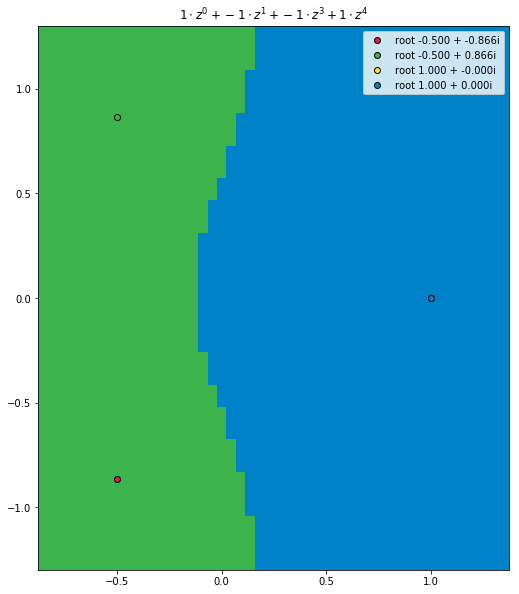

In [16]:
## Takes forever to compute so I had to stop the kernel.
G = []
R = []
BB = []
L2 = [[1, -1, 0, -1, 1]]
for P in L2: 
    print("Poly: ", P)
    tit = '$' + (' + '.join([str(k)+'\cdot z^' + str(i) for i,k in enumerate(P) if k != 0])) + '$'
    g, r, bb = basinsPolyODE(P)
    G.append(g)
    R.append(r)
    BB.append(bb)
    plotBasins(g,r,bb,tit)
    plt.show()
    plt.close()